In [1]:
include("../Engine/Engine.jl")
using .Engine

using StatsBase, DataFrames
using Graphs, SimpleWeightedGraphs
using Latexify
import PyPlot as plt
import Seaborn as sns
import PlotlyJS

rcParams = plt.PyDict(plt.matplotlib."rcParams")
rcParams["text.usetex"] = false
rcParams["font.family"] = ["sans-serif"]
rcParams["font.serif"] = ["Computer Modern Roman"];

WebIO._IJuliaInit()

In [2]:
graphs, cascades, df = load_data("/home/ubuntu/Thesis/Results/TE_all_users/COP26/data.jld2")
graphs2, cascades2, df2 = load_data("/home/ubuntu/Thesis/Results/TE_all_users/Random/data.jld2");

In [3]:
general_ranks = Metrics.get_general_ranks(COP26, cop_26_dates)
centrality_ranks = get_centrality_ranks(graphs, df, 0, "Any Edge")
all_centrality_ranks = get_centrality_ranks_all_edges(graphs, df, 0);

In [50]:
idx = 1

ranking1 = find_max_ranks(general_ranks[idx], centrality_ranks[idx])
ranking2 = find_max_ranks(all_centrality_ranks[idx])

LoadError: UndefVarError: find_max_ranks not defined

In [62]:
ranking = ranking[:, Not(["betweenness_rank_Any_Edge", "outdegree_rank_Any_Edge"])]

,betweenness_rank_T_to_T,betweenness_rank_T_to_U,betweenness_rank_U_to_T,betweenness_rank_U_to_U
,String,String,String,String
1,RobotChange,PrisonPlanet,shihtzzu,david41032
2,HarwoodEdu,LarsonKellie,KeillerDon,ChinaDaily
3,eduCCateGlobal,OohFa,Chris_1791,MaiaEnergyLtd
4,TinTincognito,MJW_DC,TerranEmpire,PepperInVegas
5,highcountrynews,bruce_schlink,Yujinesque,ZechiniVicki
6,LehtmanMaria,WakeUpAmericaDR,NoNukeBailouts,MaryLis98915532
7,joincurby,GoodKindHappy,memeorandum,ResetTheMatrix
8,LatinoLdnOnt,SustainEurope,BoSnerdley,PaulaAlquist
9,weatherindia,RiverDartGaller,Metz1245John,BonVangUFO


In [74]:
function latexify2(df)
    N = length(names(df))
    M = length(df[:, 1])
    cols = string(repeat(["c|"], N)...)

    if N == 8
        col_names = "betweenness T-T & betweenness T-U & betweenness U-T & betweenness U-U & outdegree T-T & outdegree T-U & outdegree U-T & outdegree U-U \\\\ \\hline"
    elseif N == 6
        col_names = "tweet count & follower count & retweet count & I score & outdegree & betweenness \\\\ \\hline"
    else
        throw(ArgumentError("Df not supported"))
    end

    lines = []
    for i = 1:M
        line = ""
        for (j, col) in enumerate(names(df))
            line *= df[i, col] 
            if j < N
                line *= " & "
            end
        end
        # Double escape
        line *= " \\\\"
        push!(lines, line)
    end

    # All \ need to be escaped
    out = """\\begin{table}[]
    \\centering
    \\resizebox{\\textwidth}{!}{%
    \\begin{tabular}{|$cols}
    \\hline
    $col_names
    """

    for (i, line) in enumerate(lines)
        if i < M
            out *= "$line\n"
        else
            out *= "$line \\hline\n"
        end
    end

    out *= """\\end{tabular}%
    }
    \\caption{Top 10 most influent users using different influence metrics.}
    \\label{tab:}
    \\end{table}"""

    return out

end

latexify2 (generic function with 1 method)

In [75]:
print(latexify2(ranking))

\begin{table}[]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
betweenness T-T & betweenness T-U & betweenness U-T & betweenness U-U & outdegree T-T & outdegree T-U & outdegree U-T & outdegree U-U \\ \hline
RobotChange & PrisonPlanet & shihtzzu & david41032 & eduCCateGlobal & UNinWashington & euronewsgreen & delmartian4 \\
HarwoodEdu & LarsonKellie & KeillerDon & ChinaDaily & HarwoodEdu & laralogan & noticiasdl1 & AdoreUSAalways \\
eduCCateGlobal & OohFa & Chris_1791 & MaiaEnergyLtd & greenprofgreen & EvanUnoArt & DclareDiane & JJDJ1187 \\
TinTincognito & MJW_DC & TerranEmpire & PepperInVegas & JunkScience & TKSitis & TerranEmpire & TheRebeluniter \\
highcountrynews & bruce_schlink & Yujinesque & ZechiniVicki & pablorodas & chicagomediaX & ArabNewsBiz & TimMelino \\
LehtmanMaria & WakeUpAmericaDR & NoNukeBailouts & MaryLis98915532 & physorg_space & edwinhayward & delmartian4 & Holly2360 \\
joincurby & GoodKindHappy & memeorandum & ResetTheMatrix & Lati

In [69]:
a = "\\\\ connard 
foo snjznop"
print(a)

\\ connard 
foo snjznop

" test  \nconnard"

In [49]:
print(a)

 test  
connard

In [24]:
idx = 1
ranking = Metrics.find_max_ranks(general_ranks[idx], centrality_ranks[idx])
show(ranking, allcols=true)
println("\n")

a = latexify(ranking, env=:array)
print(a)

The partition is After COP26
10×6 DataFrame
 Row │ tweet_rank      follower_rank   retweet_rank    I score_rank     outdegree_rank   betweenness_rank 
     │ String          String          String          String           String           String           
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ rpujolvives     CNN             PrisonPlanet    lloydalter       HarwoodEdu       RobotChange
   2 │ bobhillbrain    nytimes         PaulEDawson     guardianeco      DanAlbas         TinTincognito
   3 │ TinTincognito   BBCWorld        washingtonpost  billmckibben     highcountrynews  GailWaldby
   4 │ gptnshl         NatGeo          sunlorrie       GeoffreySupran   eduCCateGlobal   HarwoodEdu
   5 │ great_thunberg  TheEconomist    wef             dwallacewells    EnvHamilton      Surly01
   6 │ raphclimbot     Reuters         MichaelEMann    GreenRupertRead  JM_Coppede       eduCCateGlobal
   7 │ Independent     WSJ    

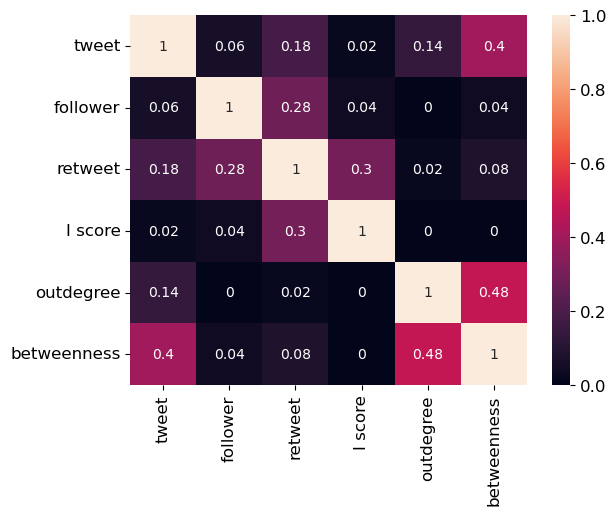

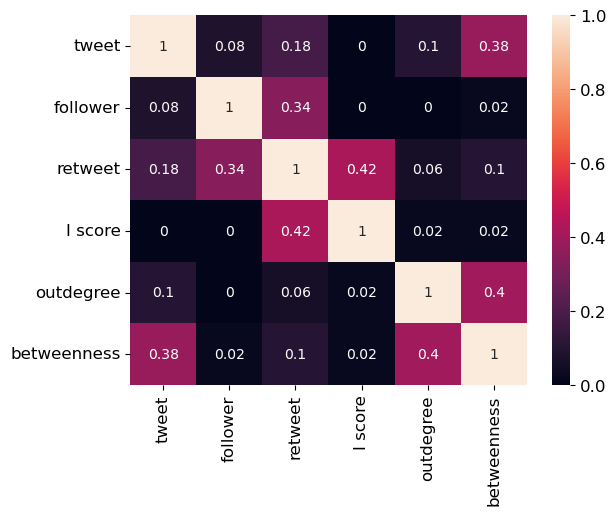

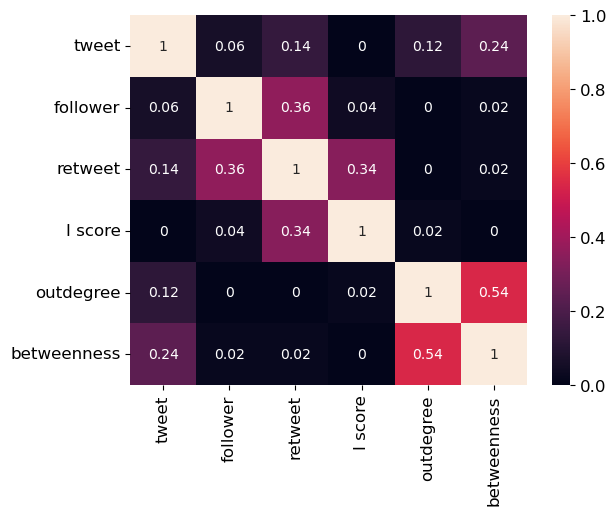

(Any[[1.0 0.06 … 0.14 0.4; 0.06 1.0 … 0.0 0.04; … ; 0.14 0.0 … 1.0 0.48; 0.4 0.04 … 0.48 1.0], [1.0 0.08 … 0.1 0.38; 0.08 1.0 … 0.0 0.02; … ; 0.1 0.0 … 1.0 0.4; 0.38 0.02 … 0.4 1.0], [1.0 0.06 … 0.12 0.24; 0.06 1.0 … 0.0 0.02; … ; 0.12 0.0 … 1.0 0.54; 0.24 0.02 … 0.54 1.0]], Any[SubString{String}["tweet", "follower", "retweet", "I score", "outdegree", "betweenness"], SubString{String}["tweet", "follower", "retweet", "I score", "outdegree", "betweenness"], SubString{String}["tweet", "follower", "retweet", "I score", "outdegree", "betweenness"]])

In [4]:
plot_correlation_matrices(general_ranks, centrality_ranks, 50, save=true, foldername="/home/ubuntu/Thesis/Figures/TE_all_users/COP26/")

In [ ]:
edge_type = "Any Edge"
N_biggest = 20
cuttoff = 0

between, between_actors = betweenness_centralities(graphs, df, cuttoff=cuttoff, edge_type=edge_type)
in_, in_actors = indegree_centralities(graphs, df, cuttoff=cuttoff, edge_type=edge_type)
out, out_actors = outdegree_centralities(graphs, df, cuttoff=cuttoff, edge_type=edge_type)

between_actors[3][1:N_biggest]

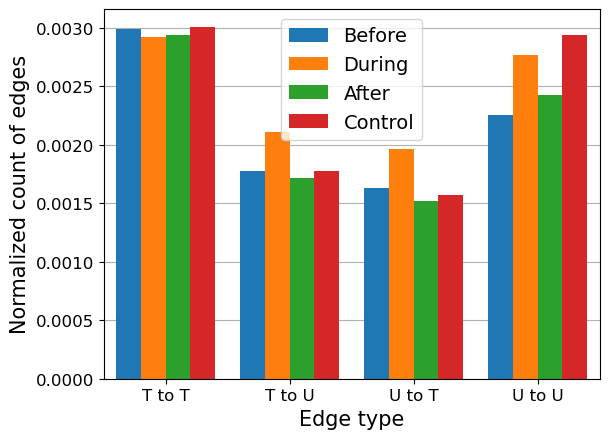

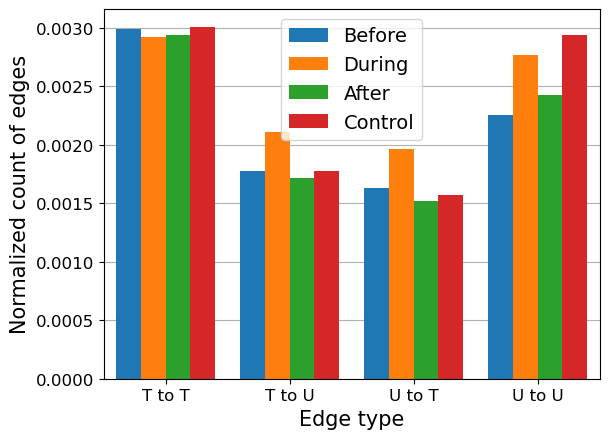

In [12]:
plot_edge_types([graphs, graphs2], [df, df2], [0,0]; y="count_normalized", hue_order=["Before", "During", "After", "Control"],
    save=true, filename="/home/ubuntu/Thesis/Figures/TE_all_users/COP26/edge_type.pdf", log=false)


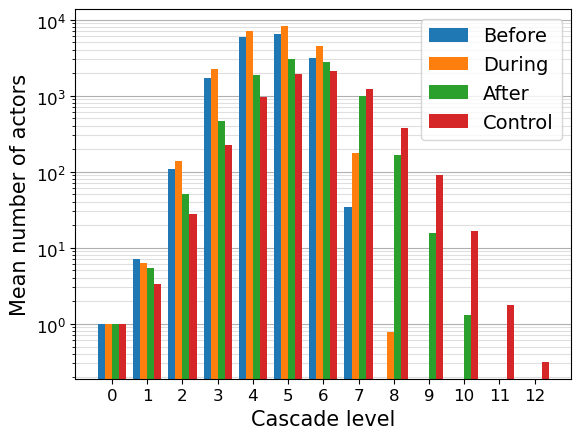

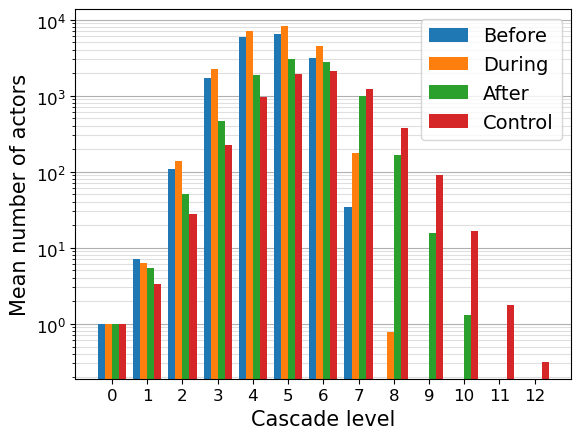

In [6]:
plot_actors_per_level(cascades, df, control=cascades2, save=true, filename="/home/ubuntu/Thesis/Figures/TE_all_users/COP26/actor_level.pdf", inner_spacing=0)


In [20]:
cascades[3]
PlotlyJS.plot(plot_cascade_sankey(cascades[3][6], df)...)
# PlotlyJS.savefig(PlotlyJS.plot(plot_cascade_sankey(cascades[3][5], df)...), "/home/ubuntu/Thesis/Figures/TE_all_users/COP26/cascade.pdf")

"/home/ubuntu/Thesis/Figures/TE_all_users/COP26/cascade.pdf"